In [1]:
import json
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random

In [3]:
# File paths and folders
flags_folder = "flag_images"  
anthem_folder = "anthems_music"  
anthem_text_folder = "anthems_text"
# Create folders if they don't exist
os.makedirs(flags_folder, exist_ok=True)
os.makedirs(anthem_folder, exist_ok=True)
os.makedirs(anthem_text_folder,exist_ok=True)
data = []

country_codes = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "\u00c5land Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Caribbean Netherlands",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, the Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Republic of the Congo",
    "CH": "Switzerland",
    "CI": "C\u00f4te d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China (People's Republic of China)",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cape Verde",
    "CW": "Cura\u00e7ao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "EU": "Europe",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB-ENG": "England",
    "GB-NIR": "Northern Ireland",
    "GB-SCT": "Scotland",
    "GB-WLS": "Wales",
    "GB": "United Kingdom",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "Korea, Republic of",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Laos (Lao People's Democratic Republic)",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen Islands",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Kingdom of Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Republic of Türkiye",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan (Republic of China)",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "US Minor Outlying Islands",
    "US": "United States",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See (Vatican City State)",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands, British",
    "VI": "Virgin Islands, U.S.",
    "VN": "Vietnam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna Islands",
    "WS": "Samoa",
    "XK": "Kosovo",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe"
}

In [5]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.5672.63 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.google.com/",
    "Connection": "keep-alive",
}
# Select 150 random countries from JSON data
selected_items = random.sample(list(country_codes.items()), 125)

In [7]:
selected_items

[('ME', 'Montenegro'),
 ('GA', 'Gabon'),
 ('BJ', 'Benin'),
 ('MG', 'Madagascar'),
 ('SD', 'Sudan'),
 ('CV', 'Cape Verde'),
 ('CW', 'Curaçao'),
 ('MV', 'Maldives'),
 ('BN', 'Brunei Darussalam'),
 ('DM', 'Dominica'),
 ('PW', 'Palau'),
 ('HM', 'Heard Island and McDonald Islands'),
 ('LA', "Laos (Lao People's Democratic Republic)"),
 ('MW', 'Malawi'),
 ('CR', 'Costa Rica'),
 ('NP', 'Nepal'),
 ('PF', 'French Polynesia'),
 ('PG', 'Papua New Guinea'),
 ('TM', 'Turkmenistan'),
 ('KI', 'Kiribati'),
 ('SK', 'Slovakia'),
 ('IL', 'Israel'),
 ('CI', "Côte d'Ivoire"),
 ('TV', 'Tuvalu'),
 ('TZ', 'Tanzania, United Republic of'),
 ('GQ', 'Equatorial Guinea'),
 ('QA', 'Qatar'),
 ('MM', 'Myanmar'),
 ('DJ', 'Djibouti'),
 ('VN', 'Vietnam'),
 ('CN', "China (People's Republic of China)"),
 ('NA', 'Namibia'),
 ('TG', 'Togo'),
 ('GN', 'Guinea'),
 ('IS', 'Iceland'),
 ('IQ', 'Iraq'),
 ('SY', 'Syrian Arab Republic'),
 ('AL', 'Albania'),
 ('DE', 'Germany'),
 ('LU', 'Luxembourg'),
 ('MX', 'Mexico'),
 ('XK', 'Kosovo

In [9]:
# Function to download a file from a URL
def download_file(url, save_path):
    try:
        response = requests.get(url, headers=headers, stream=True)
        if response.status_code == 200:
            with open(save_path, "wb") as file:
                file.write(response.content)
            return True
        else:
            print(f"Failed to download: {url} (Status code: {response.status_code})")
            return False
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return False

# Function to scrape English anthem translation
def scrape_anthem_translation(url):
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            english_translation_div = soup.find(
                lambda tag: tag.name == "div" and tag.get("title") in ["English lyrics", "English translation"]
            )
            if english_translation_div:
                anthem_div = english_translation_div.find_next_sibling("div")
                if anthem_div:
                    inner_div = anthem_div.find("div", align="left")
                    if inner_div:
                        # Remove unwanted tags and extract text
                        for tag in inner_div.find_all():
                            if tag.name != "br":
                                tag.decompose()
                        for br in inner_div.find_all("br"):
                            br.decompose()
                        return " ".join(inner_div.stripped_strings)
        else:
            print(f"Failed to scrape translation: {url} (Status code: {response.status_code})")
        return ""
    except Exception as e:
        print(f"Error scraping translation from {url}: {e}")
        return ""

# Main logic for processing countries
data = []
for i, (code, country) in enumerate(selected_items):
    lowercase_code = code.lower()

    # Paths for saving files
    flag_path = os.path.join(flags_folder, f"{lowercase_code}.jpg")
    anthem_music_path = os.path.join(anthem_folder, f"{lowercase_code}.mp3")
    anthem_english_translation_path = os.path.join(anthem_text_folder, f"{lowercase_code}.txt")

    # Download flag image
    flag_url = f"https://flagcdn.com/w320/{lowercase_code}.png"
    flag_downloaded = download_file(flag_url, flag_path)

    # Download anthem music
    anthem_url = f"https://nationalanthems.info/{lowercase_code}.mp3"
    anthem_downloaded = download_file(anthem_url, anthem_music_path)

    # Scrape English translation of the anthem
    anthem_translation_url = f"https://nationalanthems.info/{lowercase_code}.htm"
    anthem_text = scrape_anthem_translation(anthem_translation_url)
    
    if anthem_text:
        with open(anthem_english_translation_path, "w") as file:
            file.write(anthem_text)
        print(f"Downloaded English translation for {country}")
    else:
        anthem_english_translation_path = None

    # Append data to the list
    data.append([
        lowercase_code,
        country,
        flag_path if flag_downloaded else None,
        anthem_music_path if anthem_downloaded else None,
        anthem_english_translation_path,
    ])

Downloaded English translation for Montenegro
Downloaded English translation for Gabon
Downloaded English translation for Benin
Downloaded English translation for Madagascar
Downloaded English translation for Sudan
Downloaded English translation for Cape Verde
Downloaded English translation for Curaçao
Downloaded English translation for Maldives
Downloaded English translation for Brunei Darussalam
Downloaded English translation for Dominica
Downloaded English translation for Palau
Failed to download: https://nationalanthems.info/hm.mp3 (Status code: 404)
Failed to scrape translation: https://nationalanthems.info/hm.htm (Status code: 404)
Downloaded English translation for Laos (Lao People's Democratic Republic)
Downloaded English translation for Malawi
Downloaded English translation for Costa Rica
Downloaded English translation for Nepal
Downloaded English translation for French Polynesia
Downloaded English translation for Papua New Guinea
Downloaded English translation for Turkmenista

In [13]:
NUM_COUNTRIES = 100
NUM_DOMINANT_COLORS = 5
CSV_PATH = "countries_flags_and_anthems.csv"
IMAGE_SIZE = (50, 50)  # Consistent image size for analysis

In [15]:
# ---------------------- Image Analysis Functions ----------------------

def analyze_flag_colors(image_path, n_colors=NUM_DOMINANT_COLORS, resize=IMAGE_SIZE):
    """Analyzes the dominant colors in a flag image using KMeans clustering."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image at {image_path}")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, resize)  # Resize image
        pixels = image.reshape((-1, 3))  # Flatten the image into RGB pixels
        kmeans = KMeans(n_clusters=n_colors, n_init='auto', random_state=0)
        kmeans.fit(pixels)
        return kmeans.cluster_centers_.astype(int)  # Return dominant colors as integers

    except Exception as e:
        print(f"Color analysis failed for {image_path}: {e}")
        return None

def plot_dominant_colors(colors):
    """Plots the dominant colors in a horizontal bar chart."""
    if colors is None:
        print("No colors to plot.")
        return

    plt.figure(figsize=(8, 2))
    plt.imshow([[colors]])  # Display colors as an image
    plt.title('Dominant Colors')
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

In [17]:
# ---------------------- DataFrame Creation and Saving ----------------------

# Create a DataFrame from the collected data
df = pd.DataFrame(data, columns=["country_code", "country_name", "flag_path", "anthem_music_path", "anthem_text_path"])

# Data Cleaning: remove any rows with missing data
df = df.dropna()

# Data Cleaning: Reset the index after removing rows
df = df.reset_index(drop=True)

# Data Selection: Limit to the first 100 rows
df = df[:100]

# Display DataFrame Information
df.info()

# Define the path for the CSV file
csv_path = "countries_flags_and_anthems.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_path, index=False, encoding="utf-8")

# Print confirmation message
print(f"CSV file saved at: {csv_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_code       100 non-null    object
 1   country_name       100 non-null    object
 2   flag_path          100 non-null    object
 3   anthem_music_path  100 non-null    object
 4   anthem_text_path   100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB
CSV file saved at: countries_flags_and_anthems.csv


In [35]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

def analyze_anthem_text(text_path):
    """
    Analyzes the anthem text file, removing stop words, and returning the most frequent words.
    """
    try:
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Tokenize the text into words
        tokens = nltk.word_tokenize(text.lower())

        # Remove stop words and punctuation
        stop_words = set(stopwords.words('english'))
        words = [word for word in tokens if word.isalpha() and word not in stop_words]

        # Count word frequencies
        word_counts = Counter(words)

        # Get the most common words and their counts
        most_common_words = word_counts.most_common(10)  # Change 10 to how many ever you want.

        return most_common_words

    except Exception as e:
        print(f"Error analyzing anthem text at {text_path}: {e}")
        return None


In [5]:
import pandas as pd
df = pd.read_csv("countries_flags_and_anthems.csv")

In [9]:
import os

In [29]:
import nltk

# Force reinstall punkt
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
import nltk

# Redownload punkt after clearing corrupted data
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer found and ready to use!")
except LookupError:
    print("Punkt tokenizer is still missing.")



Punkt tokenizer found and ready to use!


In [39]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [43]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random

# File paths and folders
flag_images = "flag_images"  
anthems_music = "anthems_music" 
anthems_text = "anthems_text" 

In [53]:
import os
folder_path = "anthems_text"  # Replace with your folder path
files = os.listdir(folder_path)
print(files)

['af.txt', 'al.txt', 'am.txt', 'bj.txt', 'bm.txt', 'bn.txt', 'br.txt', 'bt.txt', 'bz.txt', 'cf.txt', 'ci.txt', 'cm.txt', 'cn.txt', 'cr.txt', 'cu.txt', 'cv.txt', 'cw.txt', 'cz.txt', 'de.txt', 'dj.txt', 'dm.txt', 'dz.txt', 'ee.txt', 'fj.txt', 'fk.txt', 'ga.txt', 'ge.txt', 'gm.txt', 'gn.txt', 'gq.txt', 'gt.txt', 'ht.txt', 'hu.txt', 'id.txt', 'il.txt', 'im.txt', 'iq.txt', 'je.txt', 'ke.txt', 'kh.txt', 'ki.txt', 'km.txt', 'kp.txt', 'kw.txt', 'kz.txt', 'la.txt', 'lb.txt', 'li.txt', 'lt.txt', 'lu.txt', 'ma.txt', 'mc.txt', 'me.txt', 'mg.txt', 'mk.txt', 'ml.txt', 'mm.txt', 'mt.txt', 'mu.txt', 'mv.txt', 'mw.txt', 'mx.txt', 'na.txt', 'ne.txt', 'nf.txt', 'ni.txt', 'no.txt', 'np.txt', 'nz.txt', 'om.txt', 'pa.txt', 'pf.txt', 'pg.txt', 'pw.txt', 'qa.txt', 'ro.txt', 'rw.txt', 'sa.txt', 'sb.txt', 'sc.txt', 'sd.txt', 'sg.txt', 'sh.txt', 'sk.txt', 'so.txt', 'st.txt', 'sx.txt', 'sy.txt', 'sz.txt', 'tg.txt', 'th.txt', 'tj.txt', 'tl.txt', 'tm.txt', 'tt.txt', 'tv.txt', 'tz.txt', 'ug.txt', 'va.txt', 'vc.txt',

In [55]:
# ---------------------- Analyze Anthem Texts and Update DataFrame ----------------------
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize #Import from nltk

#Try to download
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("Downloading punkt tokenizer...")
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading stopwords corpus...")
    nltk.download('stopwords')

print ("Finished Downloading")
# Function to download NLTK resources
def download_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print("Downloading punkt tokenizer...")
        nltk.download('punkt')

    try:
        stopwords.words('english')
    except LookupError:
        print("Downloading stopwords corpus...")
        nltk.download('stopwords')
# Download NLTK resources
download_nltk_resources()

def analyze_anthem_text(text_path):
    """Analyzes the anthem text file, returns the most frequent words."""
    try:
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read()
    except UnicodeDecodeError:
        print(f"Retrying with a different encoding for: {text_path}")
        with open(text_path, 'r', encoding='ISO-8859-1') as file:  # Try Latin-1 if UTF-8 fails
            text = file.read()

    # Tokenize the text into words
    tokens = word_tokenize(text.lower())
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Count word frequencies
    word_counts = Counter(words)
    # Get the most common words and their counts
    most_common_words = word_counts.most_common(10)
    return most_common_words


# Add a new column for anthem keywords
df['anthem_keywords'] = None

# Iterate through the DataFrame and analyze the anthem texts
for index, row in df.iterrows():
    anthem_text_path = row['anthem_text_path']
    if anthem_text_path and os.path.exists(anthem_text_path):
        keywords = analyze_anthem_text(anthem_text_path)
        df.at[index, 'anthem_keywords'] = keywords  # Assign keywords to the DataFrame
    else:
        df.at[index, 'anthem_keywords'] = None

# Save the updated DataFrame to a new CSV file
df.to_csv("countries_flags_anthems_analyzed.csv", index=False, encoding="utf-8")
print("DataFrame with anthem keywords saved to countries_flags_anthems_analyzed.csv")


Finished Downloading
Retrying with a different encoding for: anthems_text\cv.txt
Retrying with a different encoding for: anthems_text\cw.txt
Retrying with a different encoding for: anthems_text\dm.txt
Retrying with a different encoding for: anthems_text\pw.txt
Retrying with a different encoding for: anthems_text\mw.txt
Retrying with a different encoding for: anthems_text\cr.txt
Retrying with a different encoding for: anthems_text\np.txt
Retrying with a different encoding for: anthems_text\pf.txt
Retrying with a different encoding for: anthems_text\pg.txt
Retrying with a different encoding for: anthems_text\tm.txt
Retrying with a different encoding for: anthems_text\sk.txt
Retrying with a different encoding for: anthems_text\tv.txt
Retrying with a different encoding for: anthems_text\qa.txt
Retrying with a different encoding for: anthems_text\mm.txt
Retrying with a different encoding for: anthems_text\vn.txt
Retrying with a different encoding for: anthems_text\cn.txt
Retrying with a dif

In [57]:

# ---------------------- Flag Color and Anthem Theme Correlation ----------------------
from collections import defaultdict

# Define thematic categories and related keywords
theme_categories = {
    "freedom": ["freedom", "liberty", "independence", "free"],
    "peace": ["peace", "unity", "harmony", "brotherhood"],
    "war": ["war", "fight", "battle", "struggle", "defend"],
    "nature": ["land", "sea", "mountain", "river", "sun", "forest"],
    "religion": ["god", "divine", "faith", "holy", "spirit"]
}

# Function to categorize color
def categorize_color(rgb):
    r, g, b = rgb
    if r > g and r > b:
        return "red"
    elif g > r and g > b:
        return "green"
    elif b > r and b > g:
        return "blue"
    else:
        return "other"
# Function that needs to be here.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Configuration
NUM_DOMINANT_COLORS = 5  # Define NUM_DOMINANT_COLORS
IMAGE_SIZE = (50, 50) #Define image_size

# Function to analyze flag colors
def analyze_flag_colors(image_path, n_colors=NUM_DOMINANT_COLORS, resize=IMAGE_SIZE):
    """Analyzes the dominant colors in a flag image using KMeans clustering."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image at {image_path}")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, resize)  # Resize image
        pixels = image.reshape((-1, 3))  # Flatten the image into RGB pixels
        kmeans = KMeans(n_clusters=n_colors, n_init='auto', random_state=0)
        kmeans.fit(pixels)
        return kmeans.cluster_centers_.astype(int)  # Return dominant colors as integers

    except Exception as e:
        print(f"Color analysis failed for {image_path}: {e}")
        return None

# Function to plot dominant colors
def plot_dominant_colors(colors):
    """Plots the dominant colors as a horizontal bar chart."""
    if colors is None:
        print("No colors to plot.")
        return

    # Create a horizontal bar of colors
    num_colors = len(colors)
    img = np.zeros((1, num_colors, 3), dtype=np.uint8)  # 1 row, num_colors columns, 3 channels (RGB)
    for i, color in enumerate(colors):
        img[0, i, :] = color

    plt.figure(figsize=(8, 2))
    plt.imshow(img)
    plt.title('Dominant Colors')
    plt.axis('off')
    plt.show()
# Create a data structure to store co-occurrence counts
co_occurrence = defaultdict(lambda: {"red": 0, "green": 0, "blue": 0, "other": 0})

# Iterate through the DataFrame
for index, row in df.iterrows():
    anthem_keywords = row['anthem_keywords'] #
    flag_path = row['flag_path'] #This is for error handeling to make sure flag path exist

    if isinstance(anthem_keywords, str) and anthem_keywords != 'None': #If it is loaded incorrectly.
        try:
            anthem_keywords = eval(anthem_keywords) #Loads string like dictionary
        except:
            print ("Did not evaluate the string")
    #Check to see if files work
    if  anthem_keywords and flag_path and os.path.exists(flag_path): #added flag_path check
        # Analyze flag colors
        dominant_colors = analyze_flag_colors(flag_path) if flag_path else None

        if dominant_colors is not None:
            # Categorize the flag colors
            flag_categories = [categorize_color(color) for color in dominant_colors]

            # Find the themes in the anthem keywords
            themes = []
            if isinstance(anthem_keywords, list): #Added check if list
                for theme, keywords in theme_categories.items(): #Fixed iteritems
                    if any(keyword in [word for word, count in anthem_keywords] for keyword in keywords):
                        themes.append(theme)

            # Update co-occurrence counts
            for theme in themes:
                for color in flag_categories:
                    co_occurrence[theme][color] += 1

# Print the co-occurrence results
for theme, counts in co_occurrence.items():
    print(f"Theme: {theme}")
    for color, count in counts.items():
        print(f"  {color}: {count}")


C:\Users\rajas\pywavelets-env\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\rajas\pywavelets-env\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\rajas\pywavelets-env\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\rajas\pywavelets-env\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\rajas\pywavelet

Theme: religion
  red: 55
  green: 10
  blue: 16
  other: 14
Theme: nature
  red: 66
  green: 25
  blue: 20
  other: 24
Theme: freedom
  red: 52
  green: 15
  blue: 13
  other: 15
Theme: peace
  red: 32
  green: 14
  blue: 8
  other: 16
Theme: war
  red: 14
  green: 4
  blue: 4
  other: 3


Dominant colors for Montenegro flag:


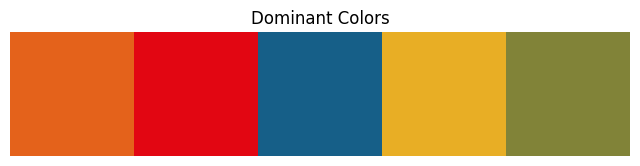

In [61]:
# ---------------------- Example Usage (Analysis of the First Flag) ----------------------
#This step is the graphs
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Configuration
NUM_DOMINANT_COLORS = 5  # Define NUM_DOMINANT_COLORS
IMAGE_SIZE = (50, 50) #Define image_size
# Image Analysis Functions (define them here, or make sure they're defined earlier)
def analyze_flag_colors(image_path, n_colors=NUM_DOMINANT_COLORS, resize=IMAGE_SIZE):
    """Analyzes the dominant colors in a flag image using KMeans clustering."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image at {image_path}")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, resize)  # Resize image
        pixels = image.reshape((-1, 3))  # Flatten the image into RGB pixels
        kmeans = KMeans(n_clusters=n_colors, n_init='auto', random_state=0)
        kmeans.fit(pixels)
        return kmeans.cluster_centers_.astype(int)  # Return dominant colors as integers

    except Exception as e:
        print(f"Color analysis failed for {image_path}: {e}")
        return None

def plot_dominant_colors(colors):
    """Plots the dominant colors as a horizontal bar chart."""
    if colors is None:
        print("No colors to plot.")
        return

    # Create a horizontal bar of colors
    num_colors = len(colors)
    img = np.zeros((1, num_colors, 3), dtype=np.uint8)  # 1 row, num_colors columns, 3 channels (RGB)
    for i, color in enumerate(colors):
        img[0, i, :] = color

    plt.figure(figsize=(8, 2))
    plt.imshow(img)
    plt.title('Dominant Colors')
    plt.axis('off')
    plt.show()

# Example Analysis
if not df.empty:
    first_flag_path = df['flag_path'].iloc[0]  # Get the file path of the first flag from the DataFrame
    if first_flag_path and os.path.exists(first_flag_path):
        dominant_colors = analyze_flag_colors(first_flag_path)
        if dominant_colors is not None:
            print(f"Dominant colors for {df['country_name'].iloc[0]} flag:")
            plot_dominant_colors(dominant_colors)
        else:
            print("Could not analyze flag colors.")
    else:
        print("No flag image available for analysis, or file does not exist.")
else:
    print("DataFrame is empty. No flags to analyze.")
